In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
from PIL import Image
import tensorflow as tf
from config import Config
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
mnist_train = mnist.train
conf = Config()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
train_locs = np.load('train_distill.npz')['locs']
train_logits = np.load('train_distill.npz')['logits']
mnist_train.locs = train_locs
mnist_train.logits = train_logits

In [4]:
def transform_coords(coords, width, height):
    """Helper function to transform from normalized, centered to cartesian."""
    new_coords = ((coords[0] + 1) * width / 2.0, (coords[1] + 1) * width / 2.0)
    return new_coords

(15.58477383852005, 12.68387633562088)


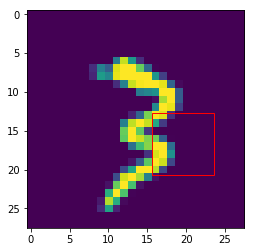

In [29]:
im = mnist_train.images[20000].reshape((28, 28))
im.shape
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
test = ax.imshow(im)

# Create a Rectangle patch
coords_arr = transform_coords(mnist_train.locs[20000][5], conf.original_size, conf.original_size)
coords = (coords_arr[0], coords_arr[1])
print(coords)
rect = patches.Rectangle(coords, conf.win_size, conf.win_size, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [52]:
def draw_ram(image_num, mnist_train, num_glimpses, orig_size, win_size):
    im = mnist_train.images[image_num].reshape((orig_size, orig_size))
    # Create figure and axes
    fig, ax = plt.subplots(1)
    patch = patches.Rectangle((0, 0), 0, 0, linewidth=1, edgecolor='r', facecolor='none')

    # initialization function: plot the background of each frame
    def init():
        ax.imshow(im)
        ax.add_patch(patch)
        return [patch]

    # animation function.  This is called sequentially
    def animate(i):
        coords = transform_coords(mnist_train.locs[image_num][i], conf.original_size, conf.original_size)
        patch.set_width(win_size)
        patch.set_height(win_size)
        patch.set_xy(coords)
        return [patch]

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=num_glimpses, blit=True)

    anim.save('ram.mp4', fps=num_glimpses, extra_args=['-vcodec', 'libx264'])
    plt.show()

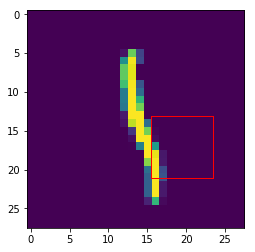

In [54]:
draw_ram(21502, mnist_train, 6, 28, 8)